<a href="https://colab.research.google.com/github/joanglaunes/BME_Math_Advanced/blob/main/TP_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BME-Paris Master - UE Math 2

# Discrete Fourier transforms and texture synthesis

$\def\R{{\mathbb R}}
\def\Z{{\mathbb Z}}
\newcommand{\x}{{\bf x}}
\newcommand{\y}{{\bf y}}
\newcommand{\z}{{\bf z}}
\def\rw{\rightarrow}$

## Grayscale and color images

A discrete grayscale image of size $M*N$ is given mathematically as an element of $\R^{M\times N}$, represented in Python by a matrix
of size $M\times N$.
We consider in fact the periodic extensions of images, i.e. an image is seen as an application from
$\Omega=\Z/M\Z\times\Z/N\Z$ into $\R$.

A color image is given by a 3D array of size $M*N*3$ which gives for each pixel the values of $RGB$ components.
It can be converted into a grayscale image by taking the mean value of the three components for each pixel (luminance image) :

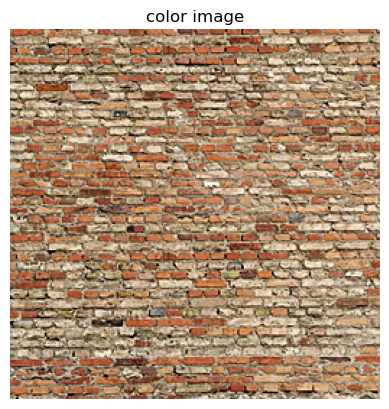

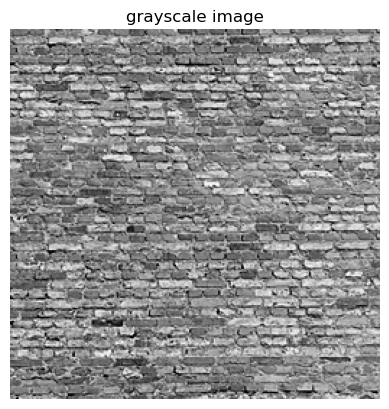

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = plt.imread('briques.bmp');
plt.imshow(h)
plt.axis("off")
plt.title('color image')
plt.show()

h = h.astype(np.float32)
h = np.mean(h,axis=2)
plt.imshow(h, cmap="gray")
plt.axis("off")
plt.title('grayscale image')
plt.show()

In the following we will work only with grayscale images.

## Discrete Fourier transform of an image

The discrete Fourier transform of $h:\Omega\rw\R$ is obtained in Python via the command `np.fft.fft2}`. The Fourier transform of an image is a matrix of complex numbers. To visualize it, we display separately the amplitude (modulus of the coefficients) and the phase (arguments). Moreover, it is better visualized by shifting the low-order coefficients to the center of the image, which is done in Matlab with the command `np.fft.fftshift`

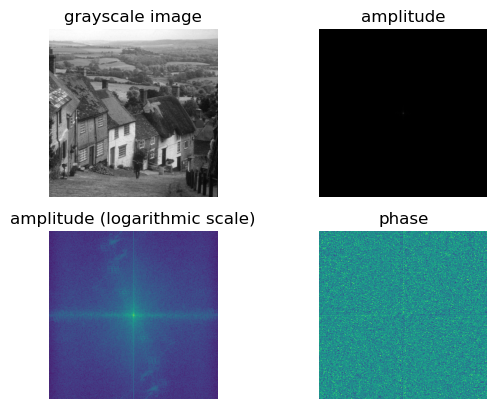

In [ ]:
h = plt.imread('hill.png').astype(np.float32)

plt.subplot(2,2,1)
plt.imshow(h,cmap='gray')
plt.axis("off")
plt.title('grayscale image')

f = np.fft.fft2(h);
fs = np.fft.fftshift(f);
plt.subplot(2,2,2)
plt.imshow(np.abs(fs), cmap='gray')   # this gives an almost black image, low-order coefficients have much larger modulus than others.
plt.axis("off")
plt.title('amplitude')

plt.subplot(2,2,3)
plt.imshow(np.log(np.abs(fs)+1))     # same image, but with logarithmic scaling
plt.axis("off")
plt.title('amplitude (logarithmic scale)')

plt.subplot(2,2,4)
plt.imshow(np.angle(fs))
plt.axis("off")
plt.title('phase');

One can notice a white cross in the middle of the image of the amplitude. This is due to the high frequency components carried by the boundaries of the image. In fact one has to remember that in Fourier analysis, signals are considered as periodic. Here we can display this periodic extension on a larger window to get an idea of what happens :

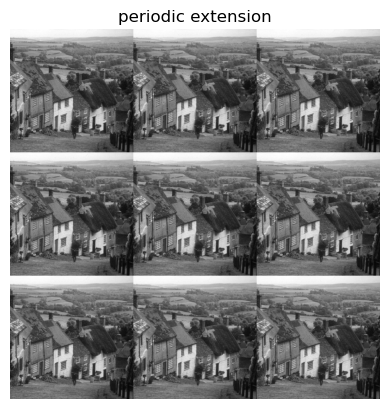

In [ ]:
plt.imshow(np.tile(h,(3,3)), cmap='gray')
plt.axis('off')
plt.title('periodic extension');

The discontinuity between the upper and lower boundaries of the image gives high Fourier components at all frequencies along vertical directions. This is also true between left and right borders, although the discontinuity is smaller.

__1)__ Display the same elements (image, periodic extension, amplitude, phase) for:
- other test images
- the image of a white spot obtained via the command `h = GaussImage(512,40)`
- a gaussian white noise image.

The inverse Fourier transform is obtained via the command `np.fft.ifft2`, so that computing `np.fft.ifft2(np.fft.fft2(h))` we get the original image $h$.
Sometimes, due to round-off errors, the imaginary parts of the complex coefficients might not equal exactly zero. Hence it is safer to take the real part of the reconstructed image:

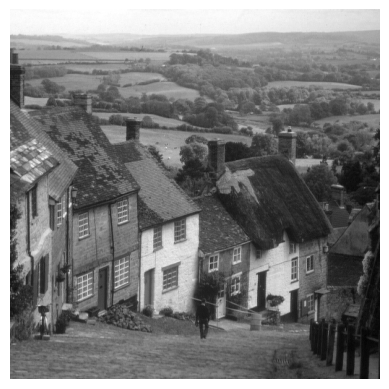

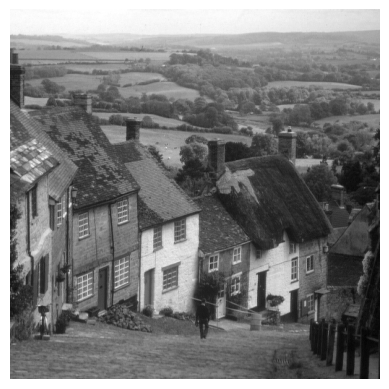

In [ ]:
from numpy.fft import fft2, ifft2

h_rec = ifft2(fft2(h));
plt.imshow(h, cmap="gray"); plt.axis('off'); plt.show()

#plt.imshow(h_rec, cmap="gray"); plt.axis('off'); plt.show()     # possible error : h_rec is complex

h_rec = np.real(h_rec)
plt.imshow(h_rec, cmap="gray"); plt.axis('off'); plt.show();

## Texture synthesis via Random Phase Noise

The idea in this section is to understand the role of the phase component of the Fourier transform. We will do the simple following experiment : we replace the phase component of an image by a random phase, and reconstruct the image. We will see that this procedure produce a random texture image which keeps some properties of the input image.

__2)__ Write a function `RPN(h)` that takes an image as input, computes its Fourier transform, amplitude and phase, then reconstructs an image by keeping the amplitude component and replacing the phase component by the phase of a gaussian white noise image. Test this function with several images, including the images 'hill.png',  'hair.bmp', 'briques.bmp'.